# Proyecto Final: Modelos de Hielo

Luis Alemán
\\ Jorge Ramírez

Las siguientes funciones son para implementar el método de los tres colores.

In [1]:
using PyPlot

In [2]:
using Interact

La función Red(L1,L2) genera un arreglo de L1 filas con L2 columnas, con entradas 0, 1 ó 2. Esto se hizo para tener la libertad de simular no sólo con arreglos cuadrados.

In [76]:
function Single_cluster(arreglo::Array{Int,2})
    L2=length(arreglo[1,:])
    L1=length(arreglo[:,1])
    red_bool=trues(L1,L2)
    #Se escoge un cuadrado al azar entre toda la red, y su número es escogido como 'colorA'
    i=rand(1:L1)
    j=rand(1:L2)
    colorA=arreglo[i,j]
    #Se escoge al azar un 'colorB' entre los restantes
    colorB=mod(rand(colorA+1:colorA+2),3)
    index_i=[i]
    index_j=[j]
    #Cambio el color de la celda inicial
    arreglo[i,j]=colorB
    red_bool[i,j]=false
    test=false
    t_limit=L1*2
    t=1
    while t<t_limit
        new_index_i=[]
        new_index_j=[]
        for n=1:length(index_i)
            for ii=0:1
                inew=mod1(index_i[n]+ii*2-1,L1)
                jnew=mod1(index_j[n]+ii*2-1,L2)
                if arreglo[inew,index_j[n]]==colorA && red_bool[inew,index_j[n]]==true
                    push!(new_index_i,inew)
                    push!(new_index_j,index_j[n])
                    red_bool[inew,index_j[n]]=false
                    arreglo[inew,index_j[n]]=colorB
                    test=true
                end
                if arreglo[inew,index_j[n]]==colorB && red_bool[inew,index_j[n]]==true
                    push!(new_index_i,inew)
                    push!(new_index_j,index_j[n])
                    red_bool[inew,index_j[n]]=false
                    arreglo[inew,index_j[n]]=colorA
                    test=true
                end
                if arreglo[index_i[n],jnew]==colorA && red_bool[index_i[n],jnew]==true
                    push!(new_index_i,index_i[n])
                    push!(new_index_j,jnew)
                    red_bool[index_i[n],jnew]=false
                    arreglo[index_i[n],jnew]=colorB
                    test=true
                end
                if arreglo[index_i[n],jnew]==colorB && red_bool[index_i[n],jnew]==true
                    push!(new_index_i,index_i[n])
                    push!(new_index_j,jnew)
                    red_bool[index_i[n],jnew]=false
                    arreglo[index_i[n],jnew]=colorA
                    test=true
                end
            end
        end
        index_i=deepcopy(new_index_i)
        index_j=deepcopy(new_index_j)
        if test==false
            println("there are no more squares to add")
            t=t_limit
        end
        test=false
    end
    return arreglo
end

Single_cluster (generic function with 2 methods)

In [7]:
function Red(L1,L2)
    arreglo=rand(0:2,L1,L2) 
end

Red (generic function with 1 method)

there are no more squares to add


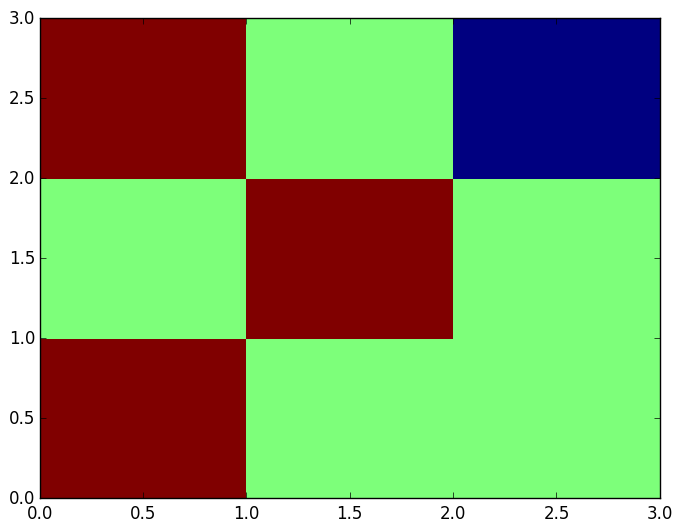

PyObject <matplotlib.collections.QuadMesh object at 0x31b605650>

In [89]:
hey=Red(3,3)
pcolormesh(hey)

there are no more squares to add


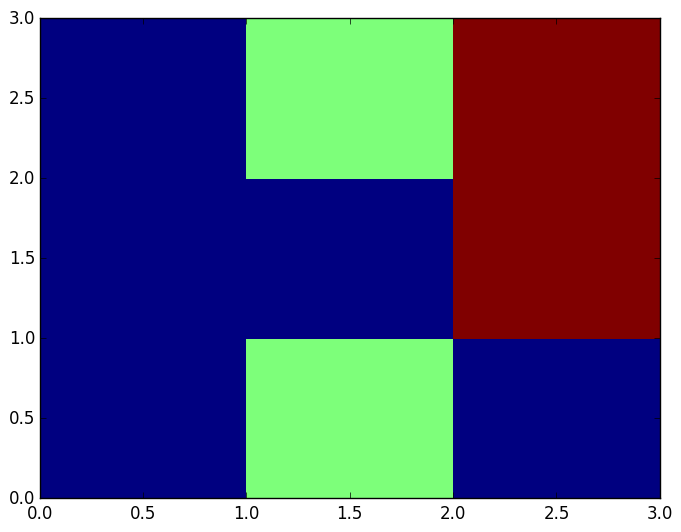

PyObject <matplotlib.collections.QuadMesh object at 0x31b010450>

In [79]:
hey=Evolucion(hey)
pcolormesh(hey)

In [1]:
function SingleCluster(arreglo::Array{Int,2},i,j,colorA, colorB)
    L2=length(arreglo[1,:])
    L1=length(arreglo[:,1])
    red_bool=trues(L1,L2)
    arreglo_old=deepcopy(arreglo)
    arreglo[i,j]=colorB
    index_i=[i]
    index_j=[j]
    red_bool[i,j]=false
    test=false
    t_limit=max(L1,L2)
    t=1
    while t<t_limit
        new_index_i=[]
        new_index_j=[]
        for n=1:length(index_i)
            for ii=0:1
                inew=mod1(index_i[n]+ii*2-1,L1)
                jnew=mod1(index_j[n]+ii*2-1,L2)
                if arreglo[inew,index_j[n]]==colorA && red_bool[inew,index_j[n]]==true
                    push!(new_index_i,inew)
                    push!(new_index_j,index_j[n])
                    red_bool[inew,index_j[n]]=false
                    arreglo[inew,index_j[n]]=colorB
                    test=true
                end
                if arreglo[inew,index_j[n]]==colorB && red_bool[inew,index_j[n]]==true
                    push!(new_index_i,inew)
                    push!(new_index_j,index_j[n])
                    red_bool[inew,index_j[n]]=false
                    arreglo[inew,index_j[n]]=colorA
                    test=true
                end
                if arreglo[index_i[n],jnew]==colorA && red_bool[index_i[n],jnew]==true
                    push!(new_index_i,index_i[n])
                    push!(new_index_j,jnew)
                    red_bool[index_i[n],jnew]=false
                    arreglo[index_i[n],jnew]=colorB
                    test=true
                end
                if arreglo[index_i[n],jnew]==colorB && red_bool[index_i[n],jnew]==true
                    push!(new_index_i,index_i[n])
                    push!(new_index_j,jnew)
                    red_bool[index_i[n],jnew]=false
                    arreglo[index_i[n],jnew]=colorA
                    test=true
                end
            end
        end
        index_i=deepcopy(new_index_i)
        index_j=deepcopy(new_index_j)
        if test==false
            t=t_limit
        end
        test=false
    end
    #Se escoge con 50% si se cambian o no los colores de este nuevo cluster 
    if rand()<0.5
        println(":C")
        return arreglo_old,red_bool
    else
        return arreglo,red_bool
    end
end

SingleCluster (generic function with 1 method)

In [2]:
function Update(red_bool,red_bool_dummy)
    L2=length(red_bool[1,:])
    L1=length(red_bool[:,1])
    for i in 1:L1
        for j in 1:L2
            if red_bool_dummy[i,j]==false
                red_bool[i,j]=red_bool_dummy[i,j]
            end
        end
    end
    return red_bool
end

Update (generic function with 1 method)

In [3]:
function MultiCluster(arreglo)
    L2=length(arreglo[1,:])
    L1=length(arreglo[:,1])
    red_bool=trues(L1,L2)
    #Se escoge al azar dos colores
    colorA=rand(0:2)
    colorB=mod(rand(colorA+1:colorA+2),3)
    for i in 1:L1
        for j in 1:L2
            if red_bool[i,j]==true
                if arreglo[i,j]==colorA || arreglo[i,j]==colorB
                    arreglo,red_bool_dummy=SingleCluster(arreglo,i,j,colorA,colorB)
                    red_bool=Update(red_bool,red_bool_dummy)
                end
            end
        end
    end
    return arreglo
end

MultiCluster (generic function with 1 method)

In [9]:
hey=Red(5,5)
@show hey
MultiCluster(hey)

hey = [1 0 1 0 0
 2 1 1 2 2
 0 0 2 2 2
 0 2 1 0 0
 0 2 1 1 1]
hwy
:C


5x5 Array{Int64,2}:
 1  0  1  0  0
 2  1  1  2  2
 0  0  2  2  2
 0  2  1  0  0
 0  2  1  1  1

In [97]:
println(u)

nothing


In [72]:
rand()

0.6484512931169182